IMPORTING THE REQUIRED MODULES AND LIBRARIES

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import random
import tensorflow

Create DataFrame for Input and Output

In [119]:
directory = "/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages"
input_path = []  
label = []       

for class_name in os.listdir(directory):
    class_path = os.path.join(directory, class_name)
    
    if os.path.isdir(class_path):
        for path in os.listdir(class_path):
            image_path = os.path.join(class_path, path)
            input_path.append(image_path)
            if class_name == 'Cat':
                label.append(0)
            elif class_name == 'Dog':
                label.append(1)

In [120]:
print(input_path[0],label[0])

/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/9733.jpg 0


In [121]:
if len(label)==len(input_path):
  print("True")
else:
  print("False")

True


In [122]:
df=pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop = True)

In [128]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db
/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db


In [129]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg',
 '/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db',
 '/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg',
 '/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db']

In [131]:
# delete db files
df = df[df['images']!='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/11702.jpg']
df = df[df['images']!='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Dog/Thumbs.db']
df = df[df['images']!='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/666.jpg']
df = df[df['images']!='/Users/admin/Downloads/kagglecatsanddogs_5340/PetImages/Cat/Thumbs.db']
len(df)

24998

    EXPLORATORY DATA ANALYSIS

In [125]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = tensorflow.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

In [126]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = tensorflow.keras.utils.load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

<Figure size 2500x2500 with 0 Axes>

<Axes: ylabel='count'>

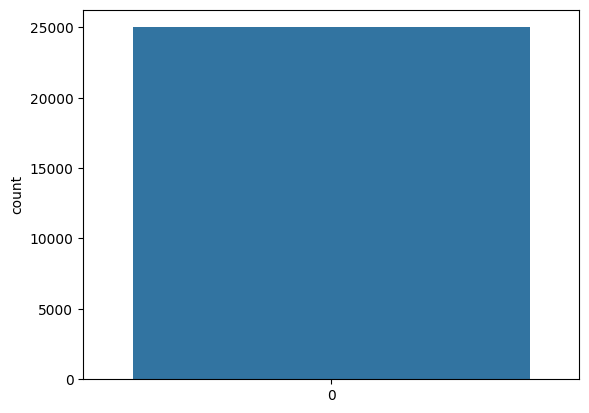

In [127]:
import seaborn as sns
sns.countplot(df['label'])

In [132]:
df['label'] = df['label'].astype('str')

In [133]:
df.head()

,images,label
0,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
1,/Users/admin/Downloads/kagglecatsanddogs_5340/...,1
2,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
3,/Users/admin/Downloads/kagglecatsanddogs_5340/...,0
4,/Users/admin/Downloads/kagglecatsanddogs_5340/...,1


DATAGENERATORS FOR IMAGES

In [134]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [135]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,#normalisation of image
    rotation_range = 40,#Augmentation of image To avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    )
val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_dataframe(train,
                                                     x_col = 'images',
                                                     y_col = 'label',
                                                     target_size = (128,128),
                                                     batch_size = 512,
                                                     class_mode = 'binary'
                                                     )
val_iterator = val_generator.flow_from_dataframe(test,
                                                     x_col = 'images',
                                                     y_col = 'label',
                                                     target_size = (128,128),
                                                     batch_size = 512,
                                                     class_mode = 'binary'
                                                     )

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


MODEL CREATION

In [136]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [137]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 14, 14, 64)      

In [139]:
history = model.fit(train_iterator, epochs=30, validation_data=val_iterator)

Epoch 1/30
40/40 [==============================] - 99s 2s/step - loss: 0.6317 - accuracy: 0.6402 - val_loss: 0.6511 - val_accuracy: 0.6018
Epoch 2/30
40/40 [==============================] - 97s 2s/step - loss: 0.5912 - accuracy: 0.6849 - val_loss: 0.5643 - val_accuracy: 0.7054
Epoch 3/30
40/40 [==============================] - 97s 2s/step - loss: 0.5684 - accuracy: 0.7051 - val_loss: 0.5590 - val_accuracy: 0.7038
Epoch 4/30
40/40 [==============================] - 100s 2s/step - loss: 0.5548 - accuracy: 0.7189 - val_loss: 0.5284 - val_accuracy: 0.7300
Epoch 5/30
40/40 [==============================] - 103s 3s/step - loss: 0.5329 - accuracy: 0.7320 - val_loss: 0.5261 - val_accuracy: 0.7346
Epoch 6/30
40/40 [==============================] - 105s 3s/step - loss: 0.5155 - accuracy: 0.7416 - val_loss: 0.5113 - val_accuracy: 0.7448
Epoch 7/30
40/40 [==============================] - 108s 3s/step - loss: 0.4976 - accuracy: 0.7587 - val_loss: 0.4751 - val_accuracy: 0.7706
Epoch 8/30
40/40

RESULT VISUALISATION

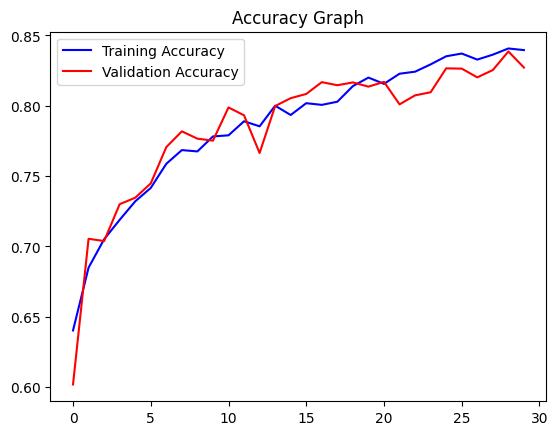

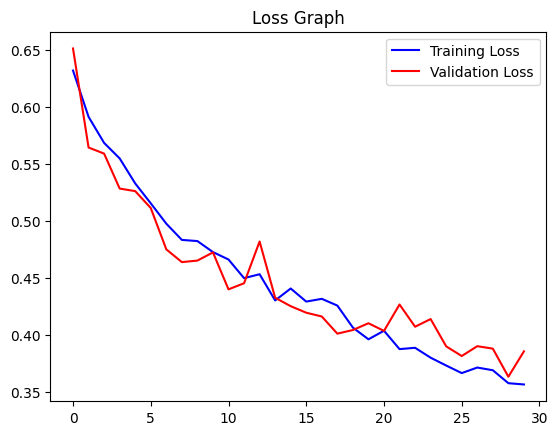

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()